## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline 
import warnings

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)


from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer,StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn.metrics import RocCurveDisplay,accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer,StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from scikitplot.metrics import plot_roc,auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Importing Data Set

In [2]:
# Read the churn dataset from the CSV file and display the first few rows
churn_ds=pd.read_csv('Churn_Modelling.CSV')
churn_ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [3]:
# Display concise summary information about the dataset
churn_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# check the shape of df
churn_ds.shape

(10000, 14)

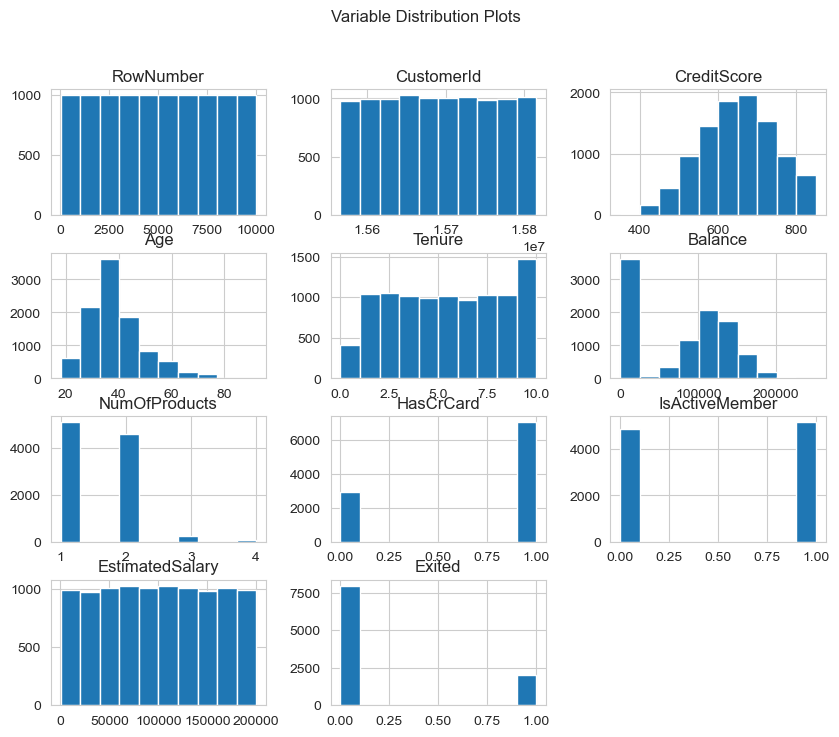

In [5]:
#Lets further explore our dataset by visualizing its variables
viz = churn_ds
viz.hist(figsize=(10, 8), bins=10)
plt.suptitle("Variable Distribution Plots")
plt.savefig("variable_distribution_plots.png")
plt.show()

In [6]:
# check for missing values and display the count of null values for each column
churn_ds.isnull().sum().to_frame().rename(columns={0:"Missing values"})

,Missing values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


There are no missing values in our data set so no need for data imputation

In [7]:
# Have a descriptive exploration of the data
churn_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
# Check for duplicates
churn_ds[churn_ds.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


There are no duplicates in our dataset.

In [9]:
# Descriptive statistics for categorical variables in the dataset
churn_ds.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


The surname column has many different last names, but it doesn't help us determine if a customer will churn, so we can remove this feature.
However, the geography and gender columns have fewer options, and they appear relevant for predicting if a customer will churn or not.

## Data Wrangling
Data wrangling is when we clean and transform raw data into a format that is suitable for analysis. It involves identifying and handling missing data, dealing with outliers, converting data types, and restructuring the data as needed

In [10]:
# Display a random sample of 5 rows to observe different parts of the dataset and identify any patterns or anomalies
churn_ds.sample(5 )

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7803,7804,15691504,Yusupova,619,Germany,Female,52,8,124099.130,1,0,0,23904.520,0
560,561,15670080,Mackenzie,584,Germany,Female,29,7,105204.010,1,0,1,138490.030,0
1925,1926,15757931,Fang,804,France,Male,24,3,0.000,2,1,0,173195.330,0
7974,7975,15722632,Dickson,716,Germany,Male,50,2,119655.770,1,1,1,12944.170,1
5806,5807,15583597,Ikedinachukwu,696,Spain,Male,47,1,106758.600,1,1,1,80591.180,0


In [11]:
# Dropping insignificant features: RowNumber, CustomerId, and Surname and rename the "Exited" column to "Churn"
churn_ds.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
churn_ds.rename(columns={"Exited": "Churn"}, inplace=True)
churn_ds

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


## Exploratory Data Analysis

Churn
0    7963
1    2037
Name: count, dtype: int64


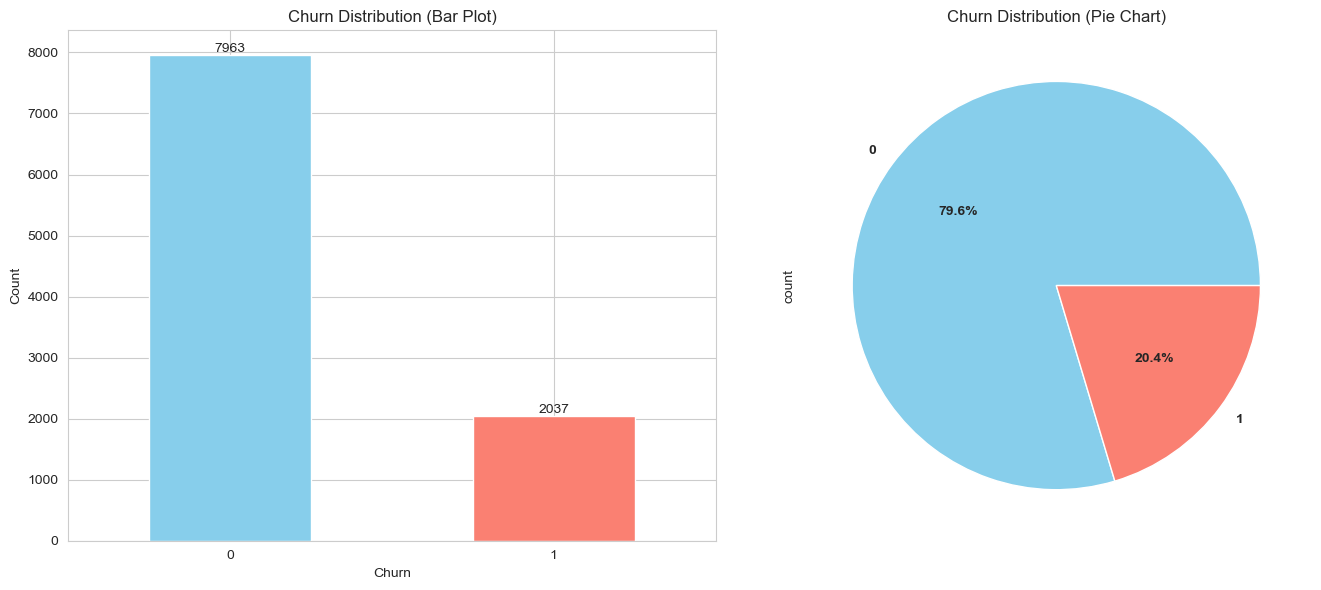

In [12]:
# Visualisation of the target variables
churn_count = churn_ds["Churn"].value_counts()
print(churn_count)
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# The target variables - Bar plot
churn_count.plot(kind="bar", color=['skyblue', 'salmon'], ax=axes[0])
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_title('Churn Distribution (Bar Plot)')
axes[0].tick_params(axis='x', rotation=0)

# Add values above the bars
for i, count in enumerate(churn_count):
    axes[0].annotate(str(count), xy=(i, count), ha='center', va='bottom')

# Visualisation of the target variables - Pie chart
churn_count.plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'salmon'], ax=axes[1], textprops={"fontweight": "bold"})
axes[1].set_title('Churn Distribution (Pie Chart)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as PNG
plt.savefig('Churn_Distribution.png')

# Show the plots
plt.show()

The significant class imbalance might cause bias in the model's performance. To address this issue, we need to employ oversampling techniques like SMOTE

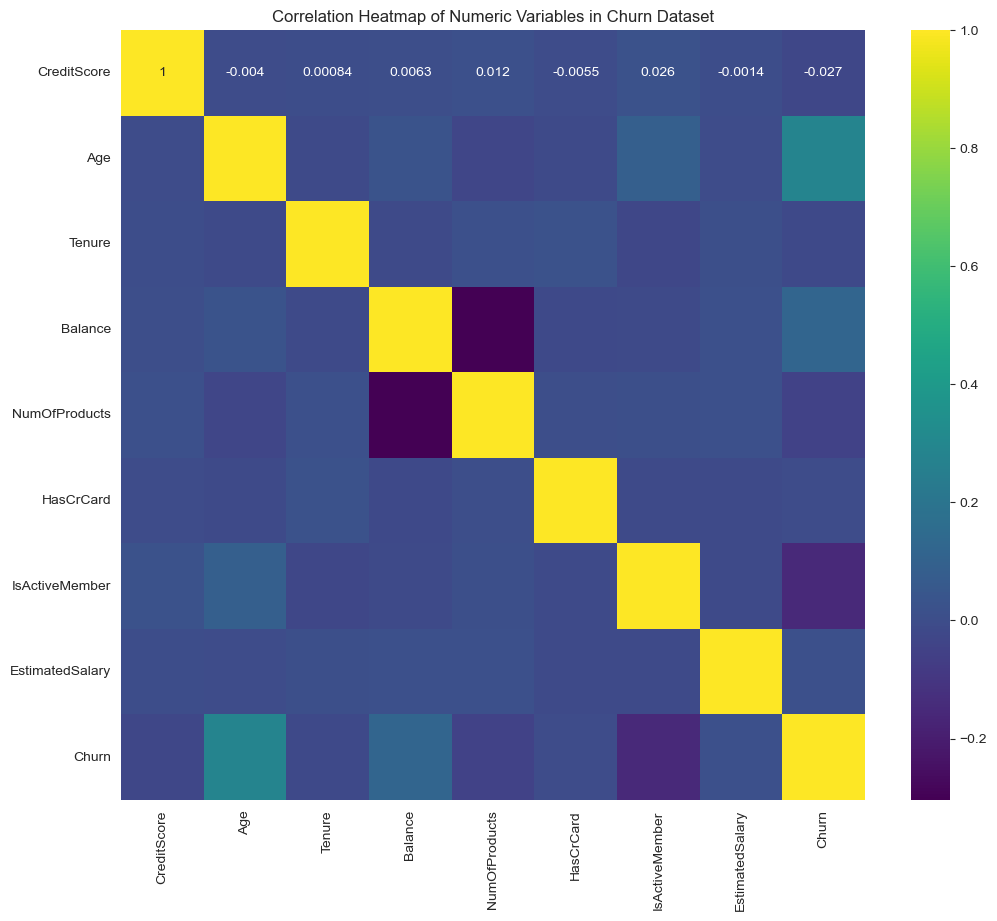

In [13]:
# Checking how the numeric variables correlate 
plt.figure(figsize=(12,10))
p = sns.heatmap(churn_ds.select_dtypes(include='number').corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numeric Variables in Churn Dataset')
# Save the figure as PNG
plt.savefig('correlation_heatmap.png')
# Show the plot
plt.show()

The correlation among the columns in the dataset is very close to being insignificant or negligible.

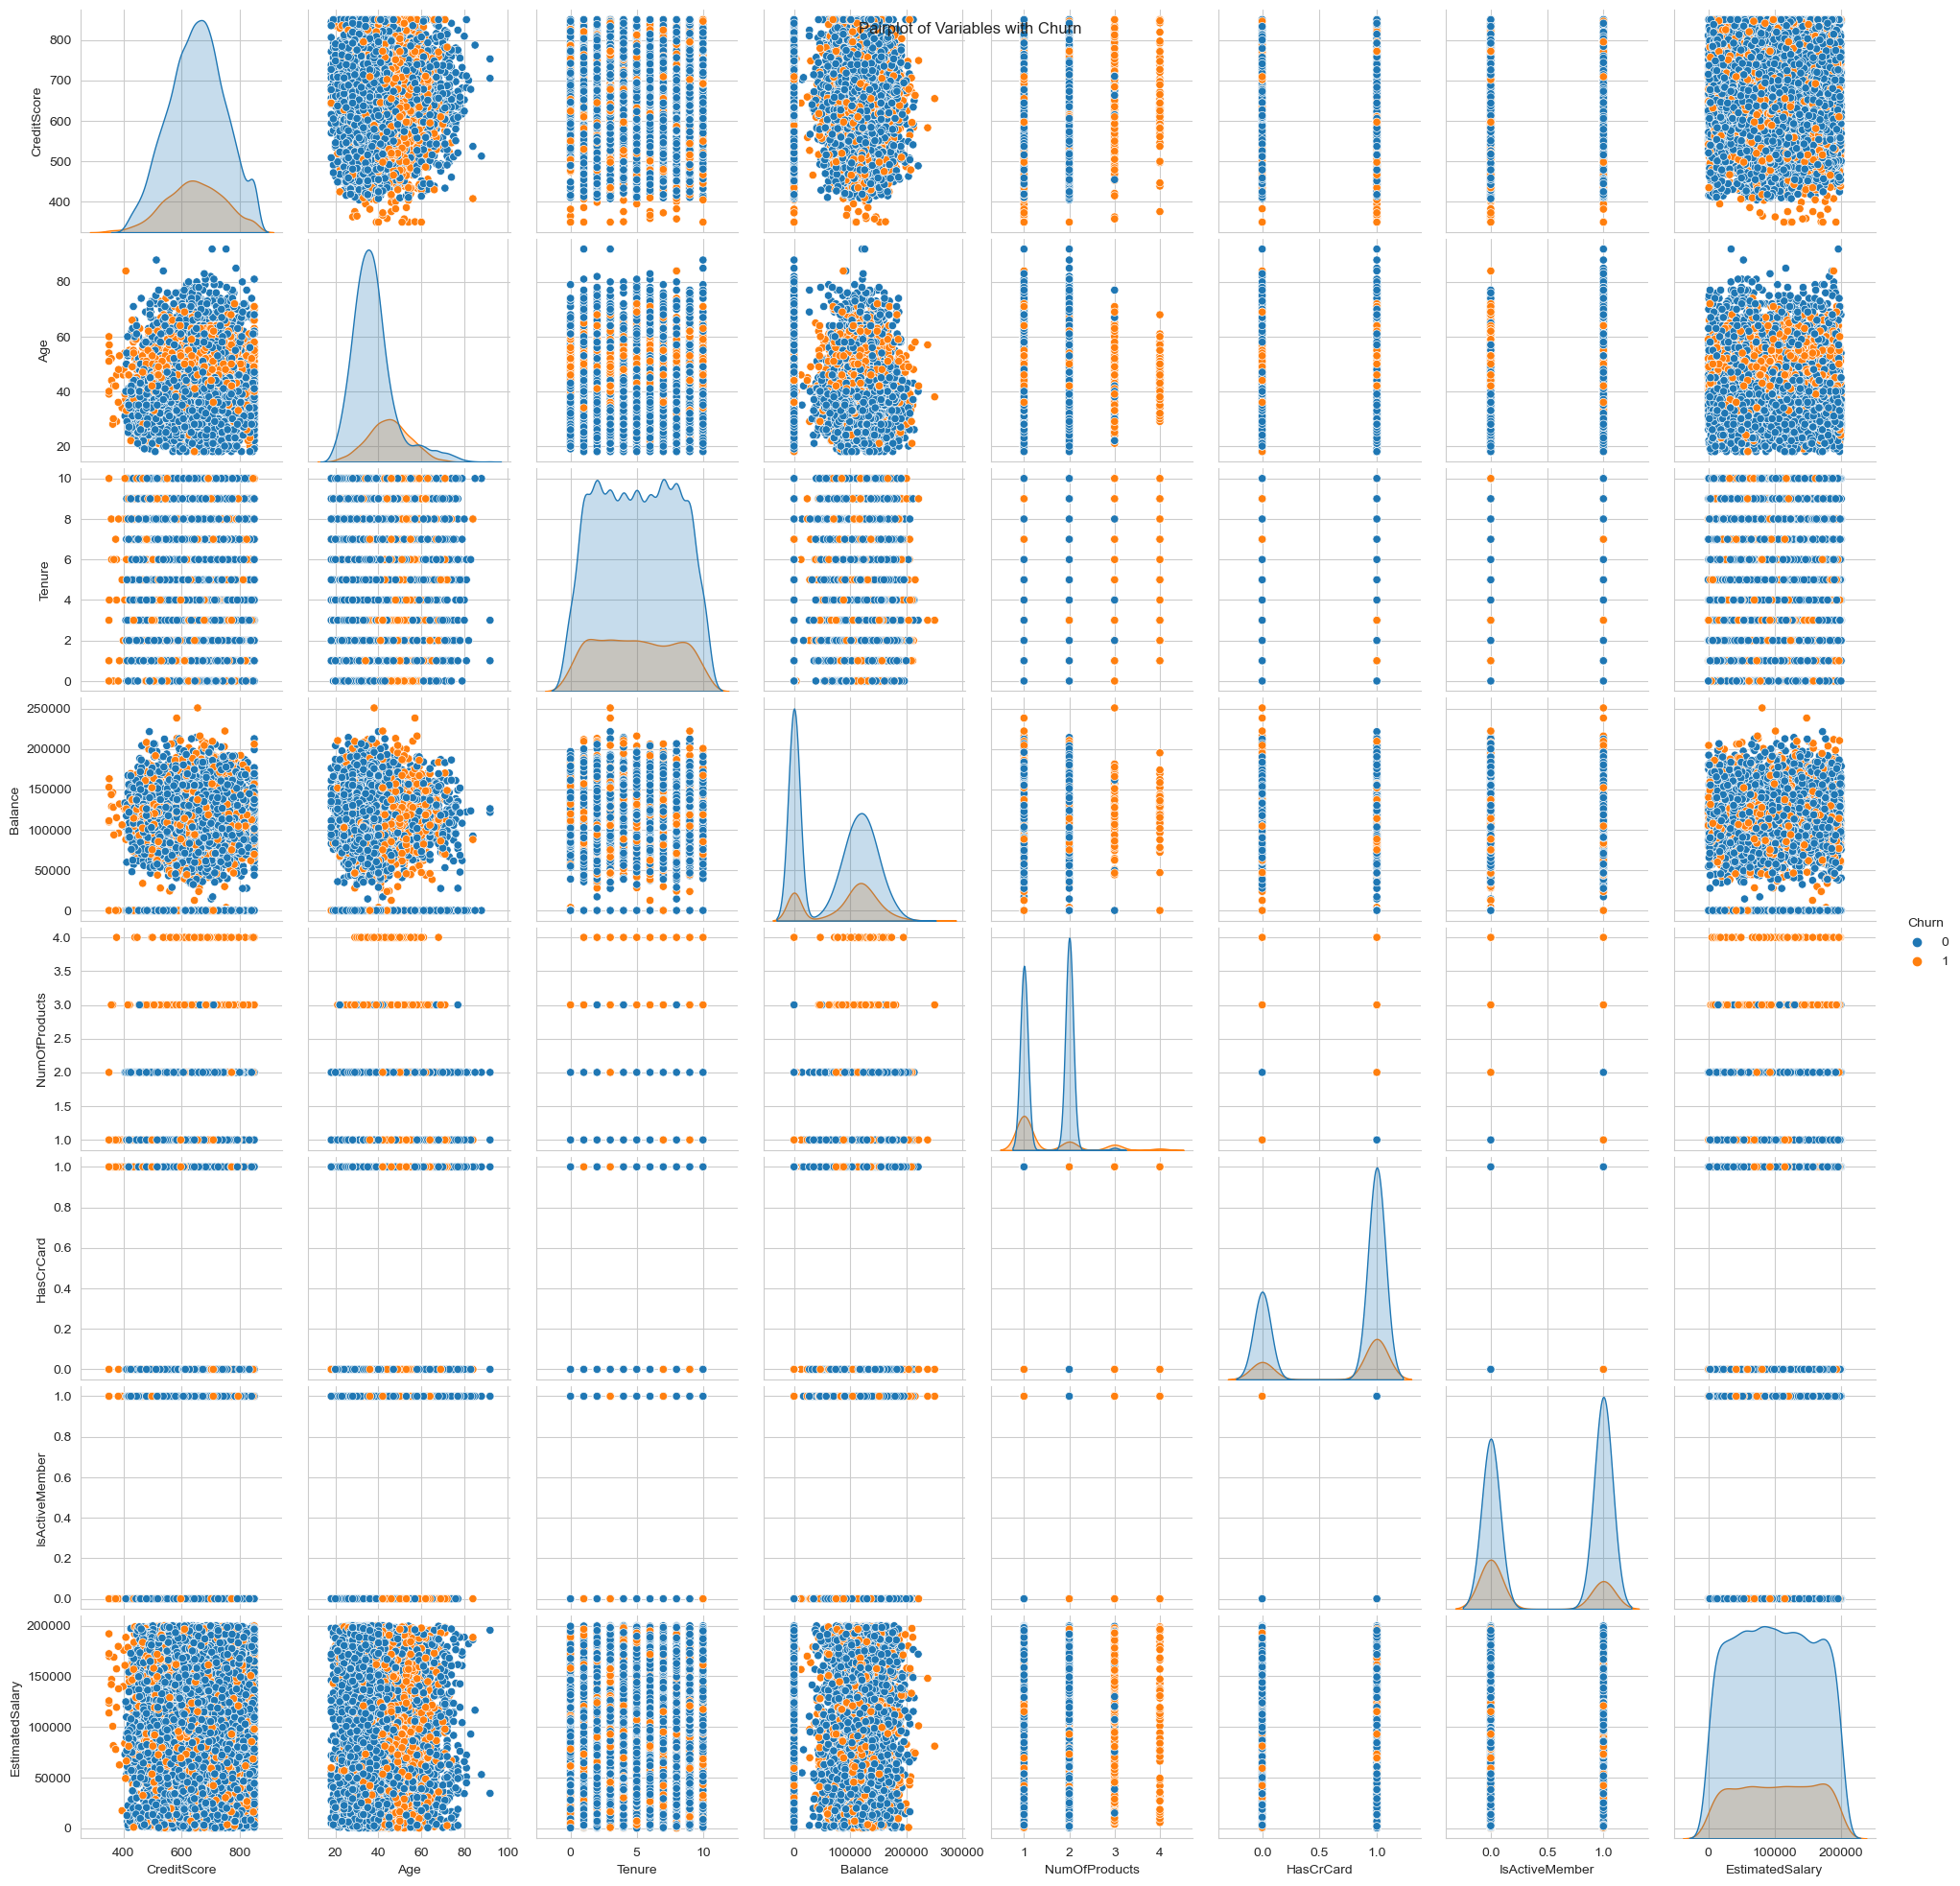

In [14]:
# Generate pairplot
pairplot = sns.pairplot(churn_ds, hue="Churn")
pairplot.fig.suptitle("Pairplot of Variables with Churn")
pairplot.savefig("pairplot.png")
plt.show()

After examining the data, it's clear that the columns don't provide much useful information for distinguishing between different groups. In particular, there's a lot of overlap between the categories within the 'Churn' variable, indicating that the features don't strongly differentiate between customers who stayed and those who left.

In [15]:
def countplot(column):
    plt.figure(figsize=(10, 5)) 
    ax = sns.countplot(x=column, data=churn_ds, hue=churn_ds["Churn"].astype(str), palette="bright")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height / len(churn_ds) * 100:.1f}%', ha="center")
    plt.title(f'Churn Distribution by {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    handles, labels = ax.get_legend_handles_labels()  
    ax.legend(handles, labels, title="Churn", title_fontsize='13', fontsize='12')
    plt.show()

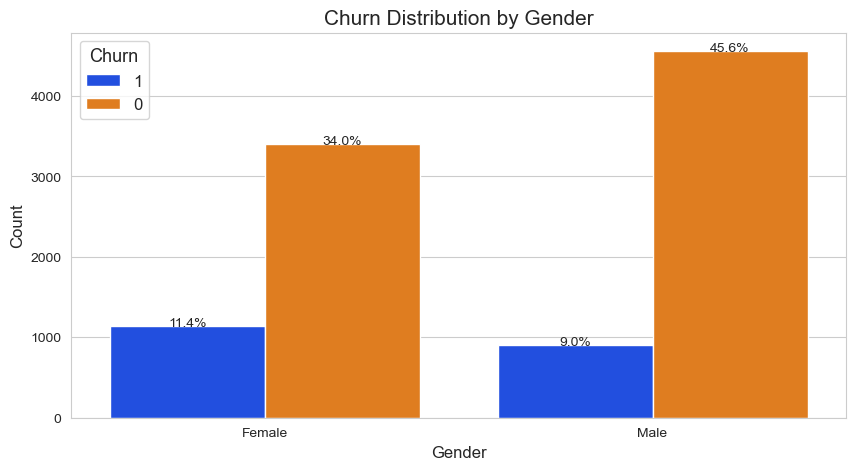

In [16]:
countplot("Gender")

The likelihood of churn is higher among female customers compared to male customers. This indicates that female customers are more inclined to deactivate their banking services compared to male customers.

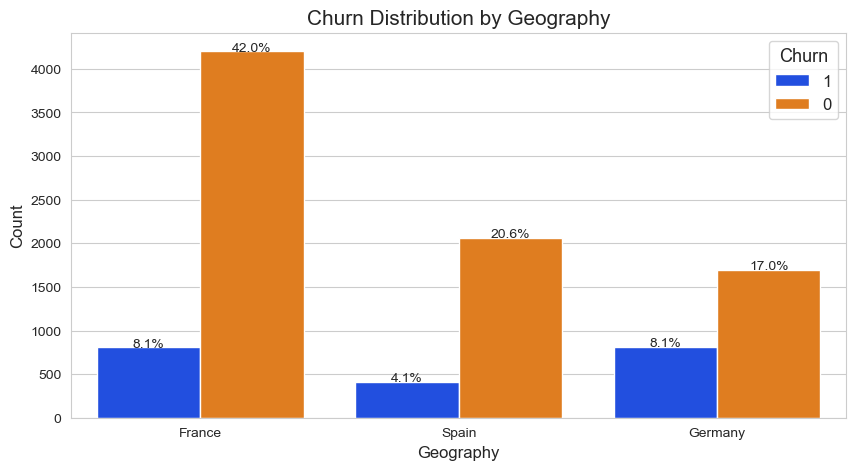

In [17]:
countplot("Geography")

Almost half of the customers originate from France, followed by Germany and Spain. Despite the significant difference in total customers between France and Germany, the churn rate for both countries' customers is similar. Although Spain and Germany have nearly equal numbers of customers, the churn rate is nearly double in Germany compared to Spain.

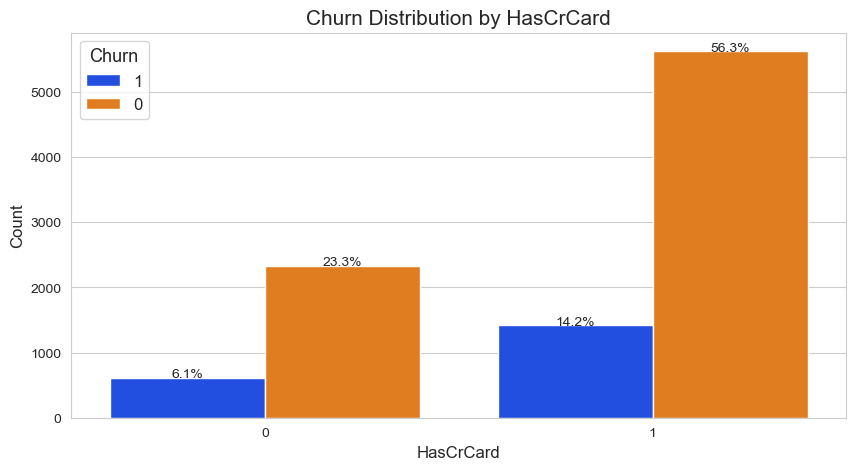

In [18]:
countplot("HasCrCard")

Over 70% of customers possess a credit card, and the churn probability is nearly the same for both groups, standing at a ratio of 1 to 4. Therefore, the presence of a credit card does not seem to influence customer churn.

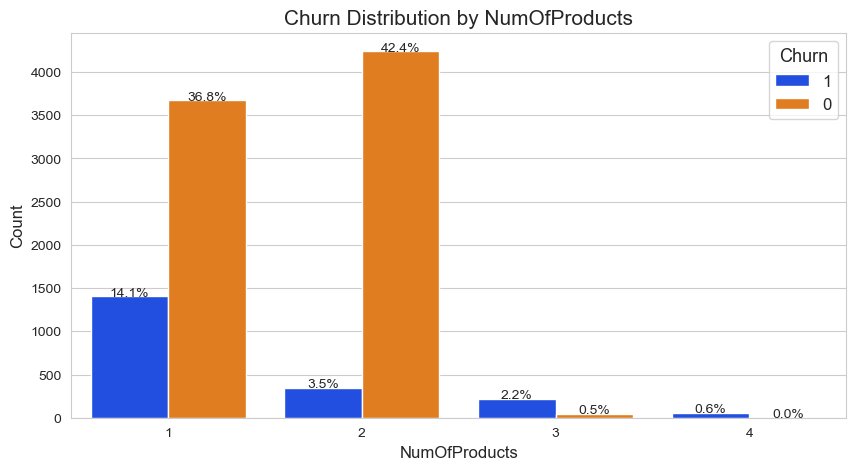

In [19]:
countplot("NumOfProducts")

The majority of customers possess either one or two banking products, with only a small fraction holding more than two. Interestingly, those with just two products exhibit the lowest churn rate, whereas customers with either one or more than two products experience considerably higher churn rates

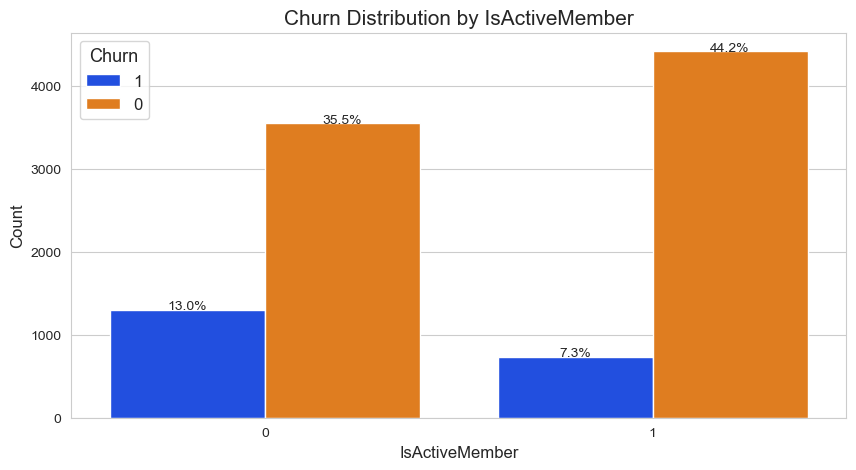

In [20]:
countplot("IsActiveMember")

There is a roughly equal distribution of customers who are either active or inactive. However, the churn rate percentage among inactive customers is nearly twice that of active customers. Thus, inactive customers are significantly more inclined to deactivate their banking services.





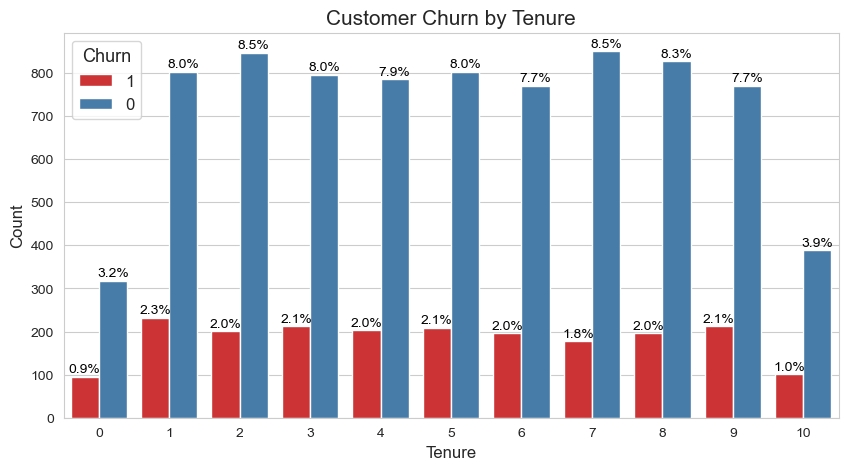

In [21]:
churn_ds["Churn"] = churn_ds["Churn"].astype(str)

# Visualizing Customer Churn by "Tenure"
plt.figure(figsize=(10, 5))  # Specify the figure size
ax = sns.countplot(x="Tenure", data=churn_ds, hue="Churn", palette="Set1")

# Add percentage labels on top of the bars
for value in ax.patches:
    percentage = "{:.1f}%".format(100 * value.get_height() / len(churn_ds["Tenure"]))
    ax.annotate(percentage, (value.get_x() + value.get_width() / 2., value.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Customer Churn by Tenure", fontsize=15)
plt.xlabel("Tenure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Churn", title_fontsize='13', fontsize='12')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The maximum tenure observed is 10 years.Given the nearly identical distribution of churn status, no specific conclusion can be drawn.

In [22]:
# Visualizing Customer Churned by "CreditScore"
def display_plot(column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churn",data=churn_ds,kde=True,palette="Set1")
    plt.title(f"Distribution of {column} by Churn Status")

    plt.subplot(1,2,2)
    sns.boxplot(data=churn_ds, x="Churn", y=column, palette="Set1")
    plt.title(f"Distribution of {column} by Churn Status")
    plt.tight_layout()
    plt.show()

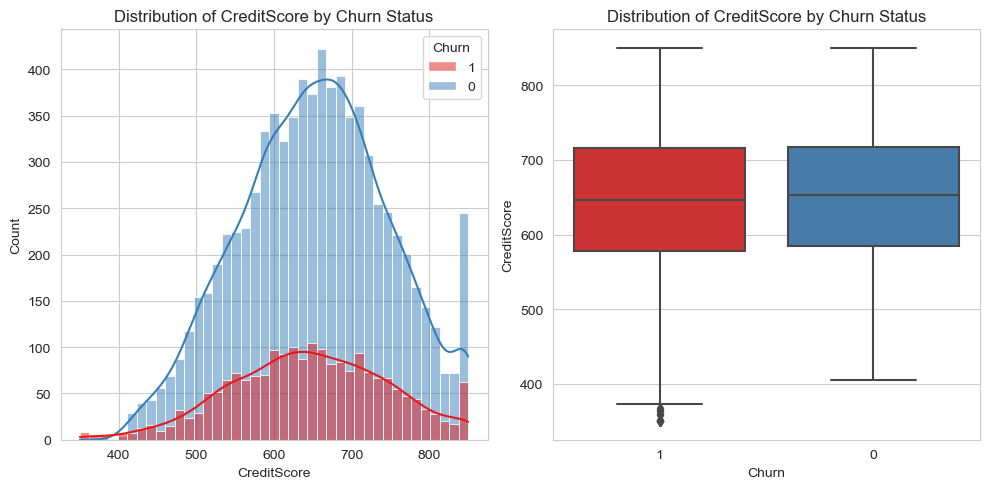

In [23]:
display_plot("CreditScore")

The median credit scores for churned and non-churned customers are nearly identical. Given this similarity in values between the two churn statuses, no significant conclusions can be drawn.

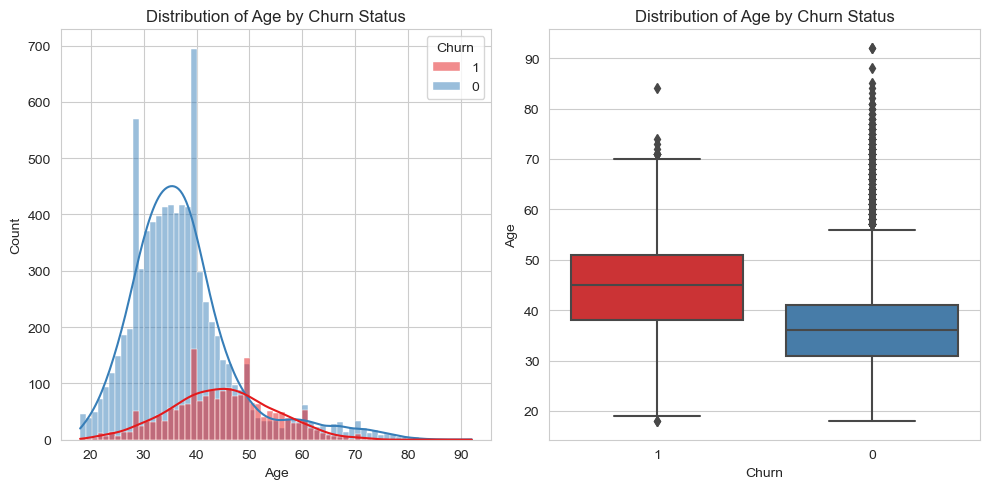

In [24]:
# Visualizing Customer Churned by Age
display_plot("Age")

The presence of outliers skews the distribution to the right, which may result in overfitting in the model. To address this right-skewed distribution, we can employ the log-normal transformation technique to achieve a normal distribution.

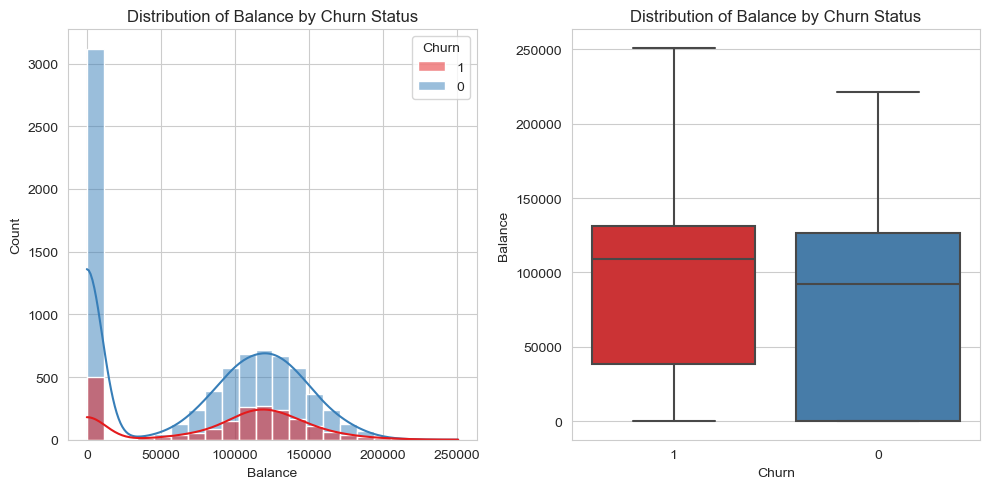

In [25]:
# Visualizing Customer Churned by Balance
display_plot("Balance")

Over 3000 customers maintain a zero balance in their accounts, a factor associated with higher deactivation rates. Excluding zero balances, we observe a normal distribution, indicating no need for additional techniques.

Feature Engineering could involve segregating customers into groups based on zero and non-zero balancees.

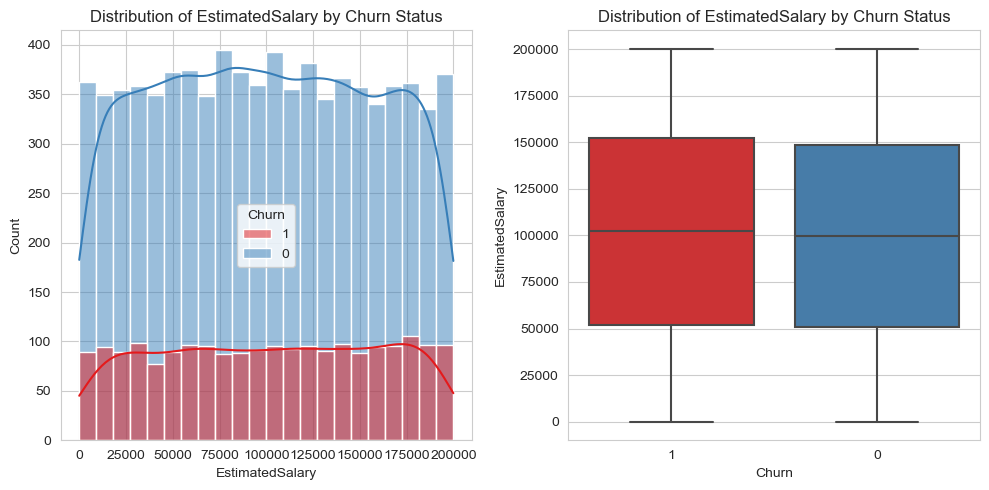

In [26]:
# Visualizing Customer Churn by Estimated Salary
display_plot("EstimatedSalary")

The median EstimatedSalary is nearly identical for both churned groups. Since the distribution is comparable across both churn categories, no significant inference can be drawn.

## Feature Engineering

1. Creating a new feature from the "NumOfProducts" Feature

In [27]:
conditions = [(churn_ds["NumOfProducts"]==1),(churn_ds["NumOfProducts"]>2), (churn_ds["NumOfProducts"]==2)]
values = ["One product","Two Products","More Than 2 Products"]

churn_ds["Total_Products"] = np.select(conditions,values)
churn_ds.drop(columns="NumOfProducts", inplace=True)

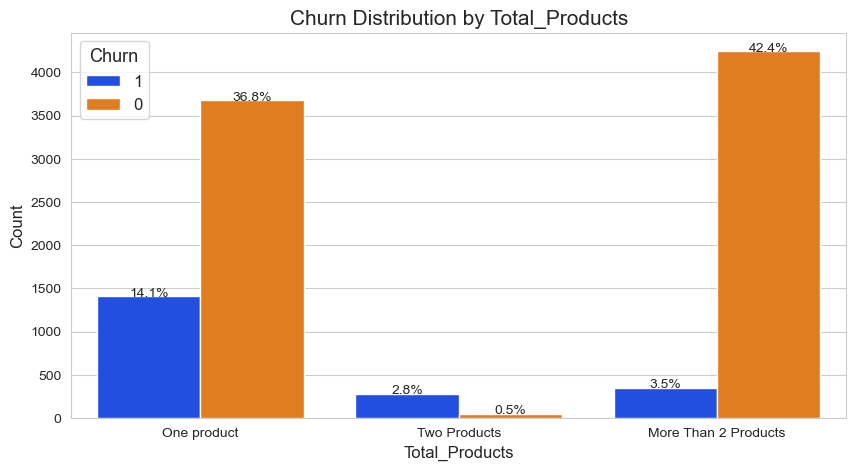

In [28]:
# Visualizing The New Feature "Total_Products"
countplot("Total_Products")

2. Creating New Feature From the "Balance" Feature

In [29]:
conditions = [(churn_ds["Balance"]==0), (churn_ds["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

churn_ds["Account_Balance"] = np.select(conditions, values)
churn_ds.drop(columns="Balance",inplace=True)

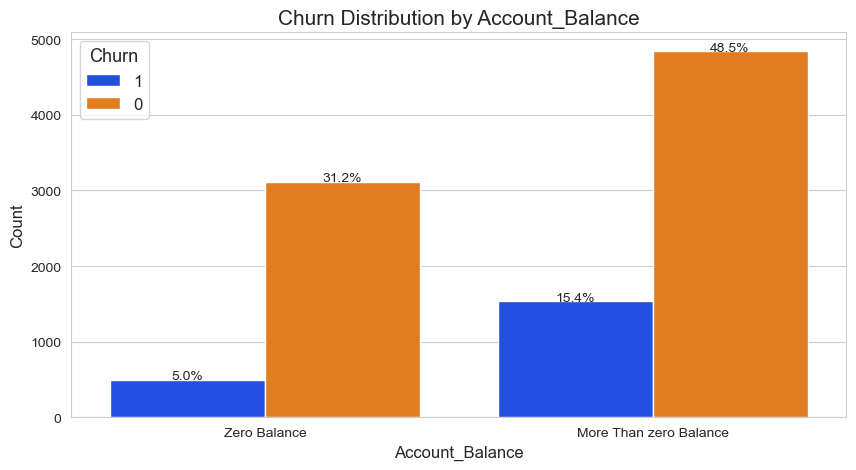

In [30]:
# Visualizing the New Account_Balance Feature 
countplot("Account_Balance")

In [31]:
churn_ds.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn', 'Total_Products',
       'Account_Balance'],
      dtype='object')

In [32]:
churn_ds.head()

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Total_Products,Account_Balance
0,619,France,Female,42,2,1,1,101348.880,1,One product,Zero Balance
1,608,Spain,Female,41,1,0,1,112542.580,0,One product,More Than zero Balance
2,502,France,Female,42,8,1,0,113931.570,1,Two Products,More Than zero Balance
3,699,France,Female,39,1,0,0,93826.630,0,More Than 2 Products,Zero Balance
4,850,Spain,Female,43,2,1,1,79084.100,0,One product,More Than zero Balance


## Data Pre-processing

In [33]:
categorical_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in categorical_cols:
    print(f"Unique Values in {column} column is:",churn_ds[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'Two Products' 'More Than 2 Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define binary and nominal columns
binary_cols = ["Gender", "Account_Balance"]
nominal_cols = ["Total_Products", "Geography"]

# Perform label encoding for binary columns
label_encoder = LabelEncoder()
for col in binary_cols:
    churn_ds[col] = label_encoder.fit_transform(churn_ds[col])

# Perform OneHot encoding for nominal columns
onehot_encoder = OneHotEncoder()
encoded_cols = onehot_encoder.fit_transform(churn_ds[nominal_cols]).toarray()
encoded_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names_out(nominal_cols))

# Concatenate the encoded columns with the original dataframe
churn_ds = pd.concat([churn_ds, encoded_df], axis=1)

# Drop the original nominal columns
churn_ds.drop(columns=nominal_cols, inplace=True)

# Display the modified dataframe
churn_ds

,CreditScore,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Account_Balance,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,1,1,101348.880,1,1,0.000,1.000,0.000,1.000,0.000,0.000
1,608,0,41,1,0,1,112542.580,0,0,0.000,1.000,0.000,0.000,0.000,1.000
2,502,0,42,8,1,0,113931.570,1,0,0.000,0.000,1.000,1.000,0.000,0.000
3,699,0,39,1,0,0,93826.630,0,1,1.000,0.000,0.000,1.000,0.000,0.000
4,850,0,43,2,1,1,79084.100,0,0,0.000,1.000,0.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,1,0,96270.640,0,1,1.000,0.000,0.000,1.000,0.000,0.000
9996,516,1,35,10,1,1,101699.770,0,0,0.000,1.000,0.000,1.000,0.000,0.000
9997,709,0,36,7,0,1,42085.580,1,1,0.000,1.000,0.000,1.000,0.000,0.000
9998,772,1,42,3,1,0,92888.520,1,0,1.000,0.000,0.000,0.000,1.000,0.000


In [35]:
#Checking Skewness of Continous Features
cols = ["CreditScore","Age","EstimatedSalary"]
churn_ds[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.072
Age,1.011
EstimatedSalary,0.002


The Age feature exhibits a significant right-skewness, indicating the existence of positive outliers. Such skewness may adversely affect the effectiveness of certain machine learning models, such as Decision Trees and Linear Models. To address this right-skewed distribution, we can apply a log-normal transformation to achieve a more normalized distribution.

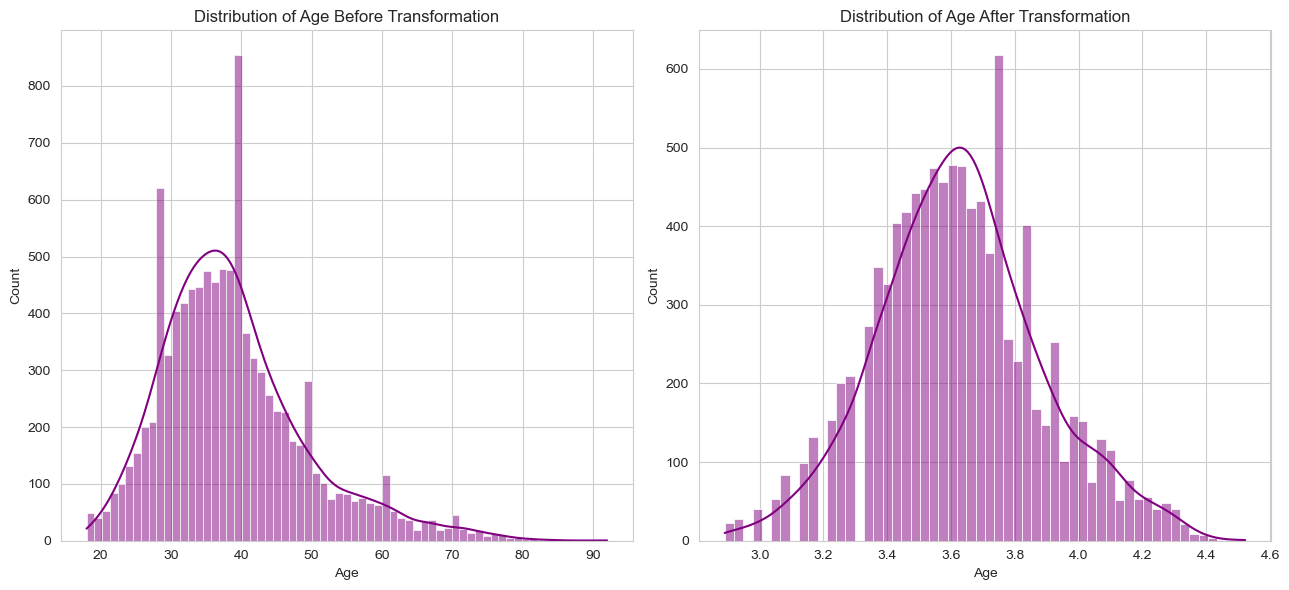

In [36]:
#  Performing Log Transformation on Age Column
old_age = churn_ds["Age"]
churn_ds["Age"] = np.log(churn_ds["Age"])

# Visualizing Age Before and After Transformation
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Distribution of Age Before Transformation")

plt.subplot(1,2,2)
sns.histplot(churn_ds["Age"], color="purple", kde=True)
plt.title("Distribution of Age After Transformation")
plt.tight_layout()
plt.show()

After implementing the log normal transformation, the age feature now exhibits a normal distribution. This adjustment will enable the model to detect more relevant patterns and construct a more accurate model

#### Defining features (X) and target variable (y)

In [37]:
X = churn_ds.drop(columns=["Churn"])
y = churn_ds["Churn"]

## Train/Test Split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train represents features for training,X_test; features for testing,y_train; Target variable for training & y_test; Target variable for testing.The dataset is split with 20% reserved for testing and a random state set for reproducibility.

In [39]:
# print the shape of the split sets
print("Train Set:",X_train.shape,y_train.shape)
print("Test Set:",X_test.shape,y_test.shape)

Train Set: (8000, 14) (8000,)
Test Set: (2000, 14) (2000,)


#### Applying SMOTE to tackle class-imbalance in the Target Variable

In [40]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
x_train_resampled,y_train_resampled = smt.fit_resample(X_train,y_train)

In [41]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 14) (12736,)


In [42]:
y_train_resampled.value_counts().to_frame()

,count
Churn,
0,6368
1,6368


Both categories within the target variable now contain an equal number of observations. Therefore, we can train the model on balanced data for both churn categories, resulting in a predictive model with reduced bias.

## Modeling

### Random Forest

In [43]:
#Performing Grid-Search with cross-validation to find the best Parameters for the Model
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,min_samples_split=6, n_estimators=50)
rfc.fit(x_train_resampled,y_train_resampled)


RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=6, n_estimators=50)

In [44]:
ytrainpred_rfc = rfc.predict(x_train_resampled)
ytestpred_rfc  = rfc.predict(X_test)

print("Random forest Accuracy Score on Training Data is",round(accuracy_score(y_train_resampled,ytrainpred_rfc)*100,2),"%")
print("Random forest Accuracy Score on Testing Data  is",round(accuracy_score(y_test,ytestpred_rfc)*100,2),"%")

Random forest Accuracy Score on Training Data is 89.0 %
Random forest Accuracy Score on Testing Data  is 84.15 %


In [45]:
# Print the classification report to evaluate the performance of rfc
print(classification_report(y_test, ytestpred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1595
           1       0.61      0.61      0.61       405

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



We notice that the recall, precision, and F1 score exhibit identical values of o.84, indicating that our model attains an ideal equilibrium between correctly identifying positive samples (recall) and minimizing false positives (precision).  

#### Model Evaluation using Confusion Matrix

[[1435  160]
 [ 157  248]]


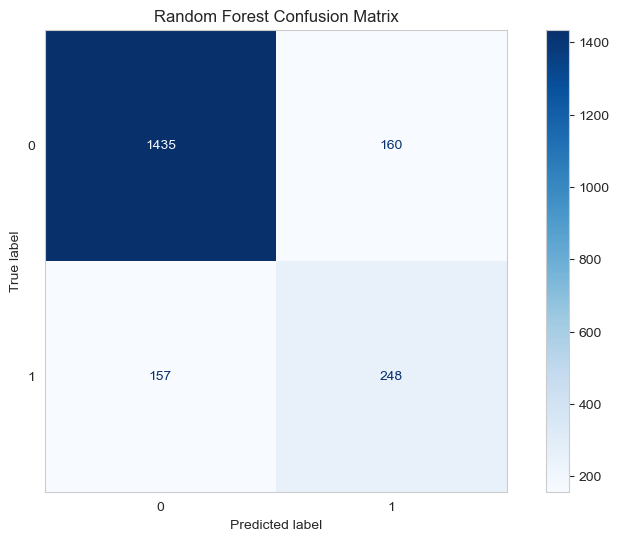

In [46]:
cnf_rfc = confusion_matrix(y_test, ytestpred_rfc)
print(cnf_rfc)

# Plot confusion matrix without gridlines
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cnf_rfc, display_labels=rfc.classes_)
disp_rfc.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.grid(False)
plt.title('Random Forest Confusion Matrix')
plt.savefig('RF Confusion_Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

The model demonstrates a strong true positive rate by accurately identifying a high number of positive cases, showcasing its effectiveness in correctly classifying desired outcomes. However, there is room for improvement in reducing the false negative rate, as the model appears to have missed identifying some actual positive cases. This highlights the need for further refinement to ensure the model's ability to capture all positive instances accurately.

#### Random Forest Model Evaluation; ROC Curve and Area Under the Curve (AUC)

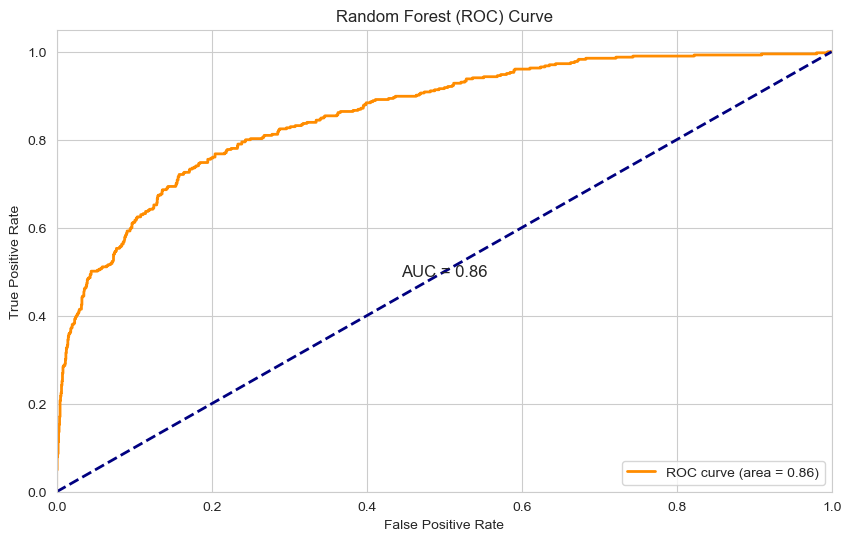

In [47]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('Random Forest (ROC)Curve.png')
plt.show()

An AUC (Area Under the Curve) value of 0.86 indicates the model possesses robust discriminative power, signifying its high capability to differentiate between positive and negative instances, thereby making accurate predictions. This suggests the model has a relatively elevated probability of assigning a higher rank to a randomly selected positive instance compared to a randomly selected negative instance.

#####  Finding Importance of Features in RandomForest Model

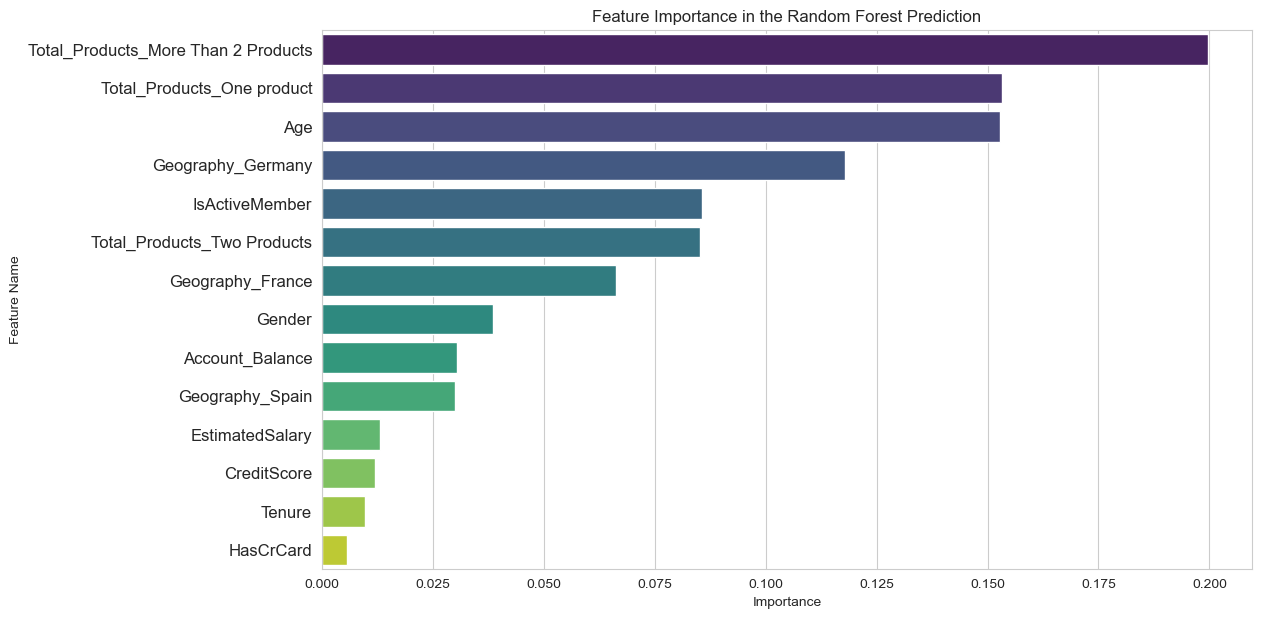

In [48]:
imp_features = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":rfc.feature_importances_})

features = imp_features.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="viridis")
plt.title("Feature Importance in the Random Forest Prediction")
plt.yticks(size=12)
plt.savefig('RF feature imp.png')
plt.show()

The key factors that significantly influence the deactivation of customers' banking facilities include Total_Products, Age, IsActiveMember, Geography, Gender, and Balance, while features such as HasCrCard, Tenure, CreditScore, and EstimatedSalary have a minimal impact on deactivation.

### XGBOOST

In [49]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable to convert classes to integers
y_train_encoded = label_encoder.fit_transform(y_train_resampled)

# Create and fit XGBoost classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_resampled, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
# Predict labels for the resampled training data and test data
y_train_pred_xgb = xgb_clf.predict(x_train_resampled)
y_test_pred_xgb = xgb_clf.predict(X_test)

# Convert string labels to integers for consistency
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train_resampled_encoded, y_train_pred_xgb)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred_xgb)

print("XGBOOST Accuracy Score on Training Data is",round(accuracy_score(y_train_resampled_encoded, y_train_pred_xgb)*100,2),"%")
print("XGBOOST Accuracy Score on Testing Data  is",round(accuracy_score(y_test_encoded, y_test_pred_xgb)*100,2),"%")

XGBOOST Accuracy Score on Training Data is 95.98 %
XGBOOST Accuracy Score on Testing Data  is 84.25 %


##### XGBOOST Evaluation; Classification report

In [51]:
# Print the classification report to evaluate the performance of XGBOOST
print(classification_report(y_test_encoded, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1595
           1       0.62      0.58      0.60       405

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000



##### Confusion Matrix

[[1452  143]
 [ 172  233]]


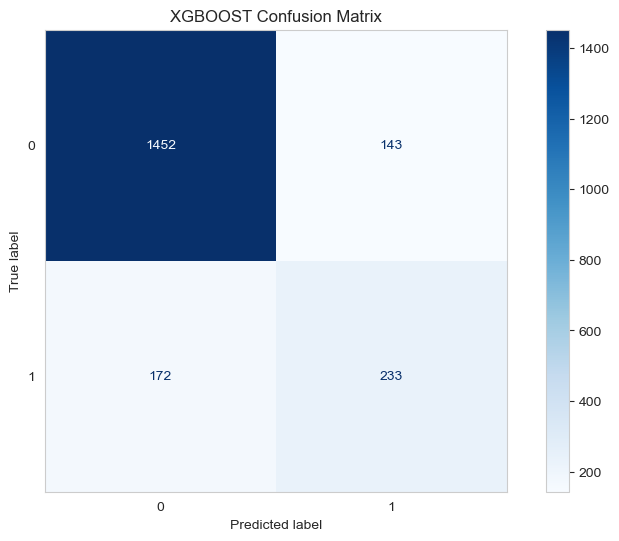

In [52]:
cnf_xgb = confusion_matrix(y_test_encoded, y_test_pred_xgb)
print(cnf_xgb)

# Plot confusion matrix without gridlines
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cnf_xgb, display_labels=rfc.classes_)
disp_xgb.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.grid(False)
plt.title('XGBOOST Confusion Matrix')
plt.savefig('XGBOOST Confusion_Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

##### ROC Curve and Area Under the Curve (AUC)

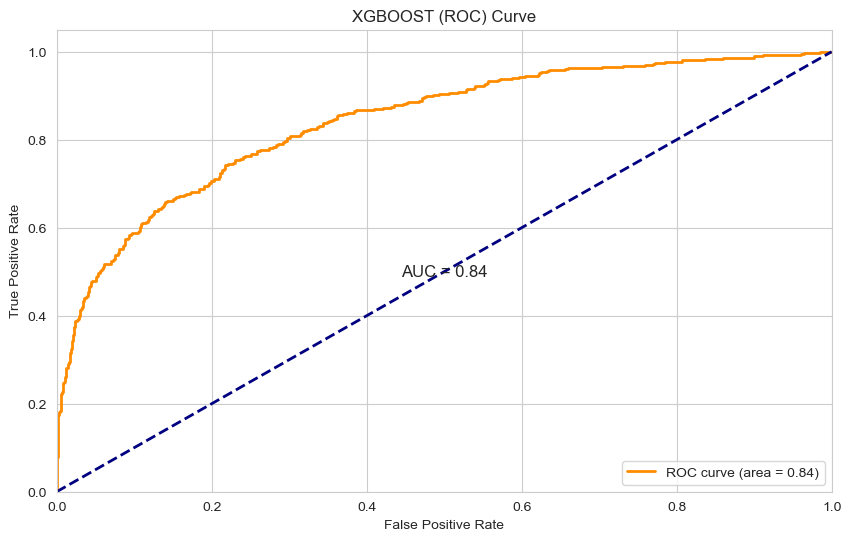

In [53]:
y_pred_proba = xgb_clf.predict_proba(X_test)[:][:,1]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBOOST (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('XGB (ROC)Curve.png')
plt.show()

##### XGBOOST Feature Importance 

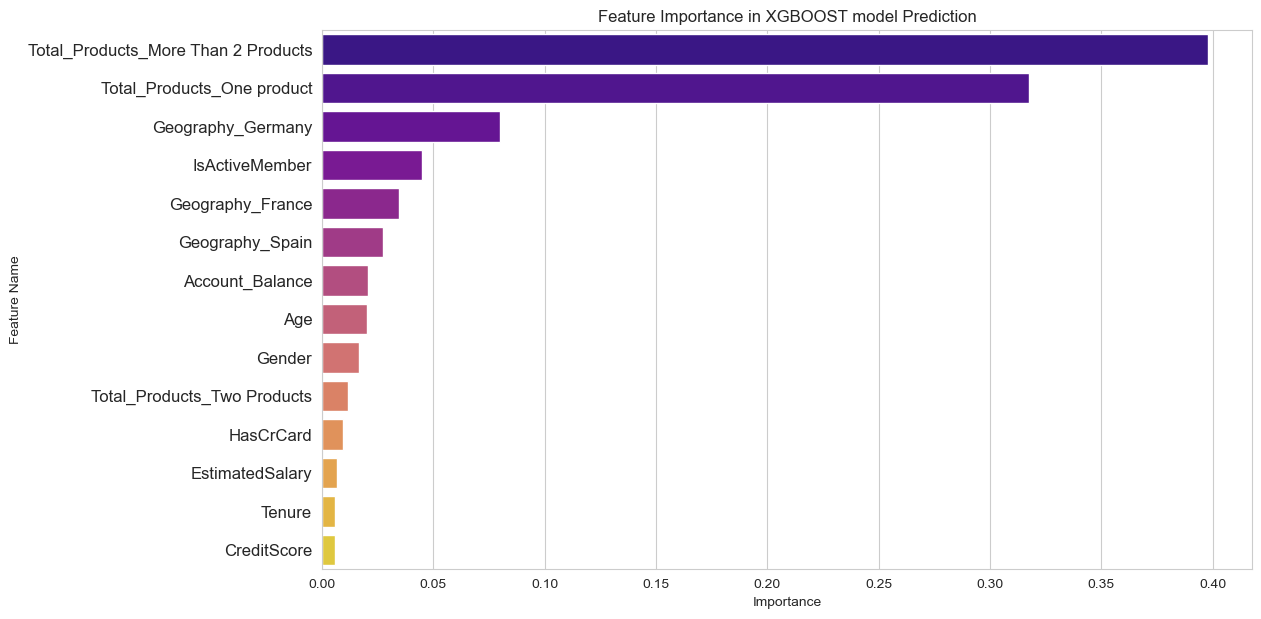

In [54]:
imp_features = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":xgb_clf.feature_importances_})

features = imp_features.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in XGBOOST model Prediction")
plt.yticks(size=12)
plt.savefig('XGB feature imp.png')
plt.show()

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=8, min_samples_split=7, random_state=42, splitter='random')
dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=8, min_samples_split=7, random_state=42,
                       splitter='random')

In [56]:
ytrainpred_dtree = dtree.predict(x_train_resampled)
ytestpred_dtree  = rfc.predict(X_test)

print("Decision Tree Accuracy Score on Training Data is",round(accuracy_score(y_train_resampled,ytrainpred_dtree)*100,2),"%")
print("Decision Tree Accuracy Score on Testing Data  is",round(accuracy_score(y_test,ytestpred_dtree)*100,2),"%")

Decision Tree Accuracy Score on Training Data is 87.31 %
Decision Tree Accuracy Score on Testing Data  is 84.15 %


In [57]:
# Print the classification report to evaluate the performance of dtree
print(classification_report(y_test, ytestpred_dtree))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1595
           1       0.61      0.61      0.61       405

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



##### Decision Tree Confusion Matrix

[[1435  160]
 [ 157  248]]


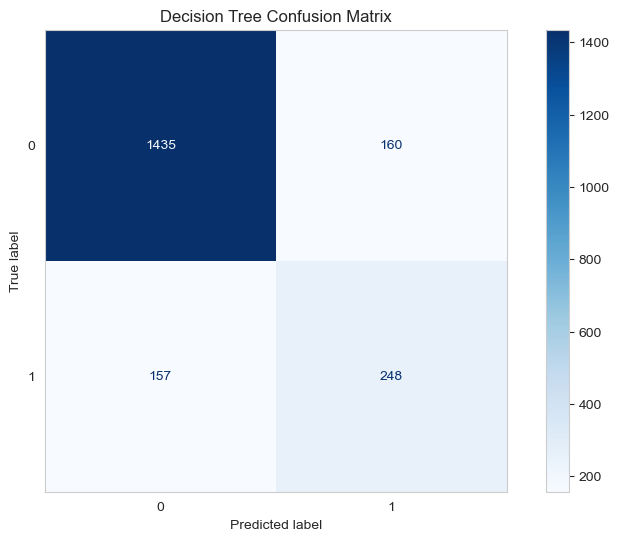

In [58]:
cnf_dtree = confusion_matrix(y_test, ytestpred_dtree)
print(cnf_dtree)

# Plot confusion matrix without gridlines
disp_dtree = ConfusionMatrixDisplay(confusion_matrix=cnf_dtree, display_labels=dtree.classes_)
disp_dtree.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.grid(False)
plt.title('Decision Tree Confusion Matrix')
plt.savefig('Decision_Tree_Confusion_Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Out of 1591 instances classified as positive, 239 were correctly identified (true positives), while 150 were mistakenly labeled as positive (false positives). Similarly, among 1611 instances classified as negative, 1445 were accurately predicted (true negatives), whereas 166 were incorrectly classified as negative (false negatives).This underscores the need for further refinement to enhance its predictive accuracy. 

##### Decision Tree Evaluation; ROC Curve and Area Under the Curve (AUC)

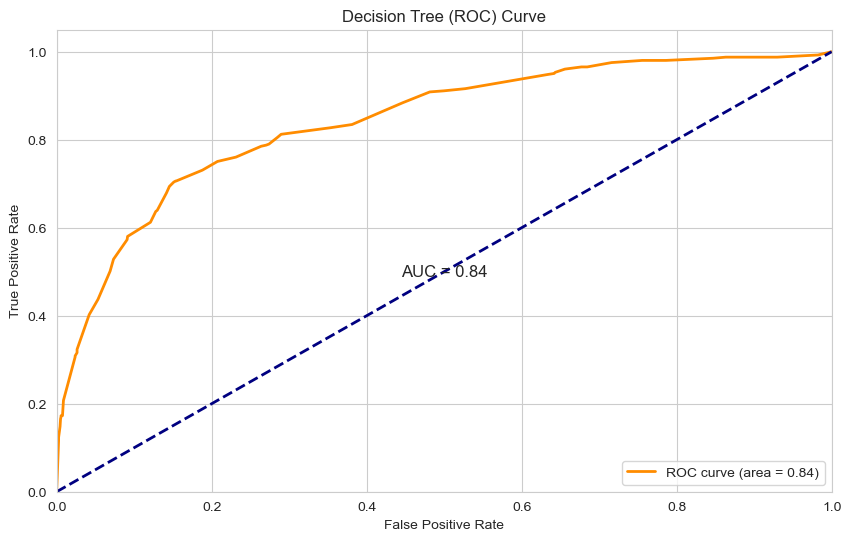

In [59]:
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('DT (ROC)Curve.png')
plt.show()

An AUC of 0.84 indicates reliable predictive capability,his means the model is effective at distinguishing between positive and negative instances

##### Decision Tree's Feature Importance Vizualization

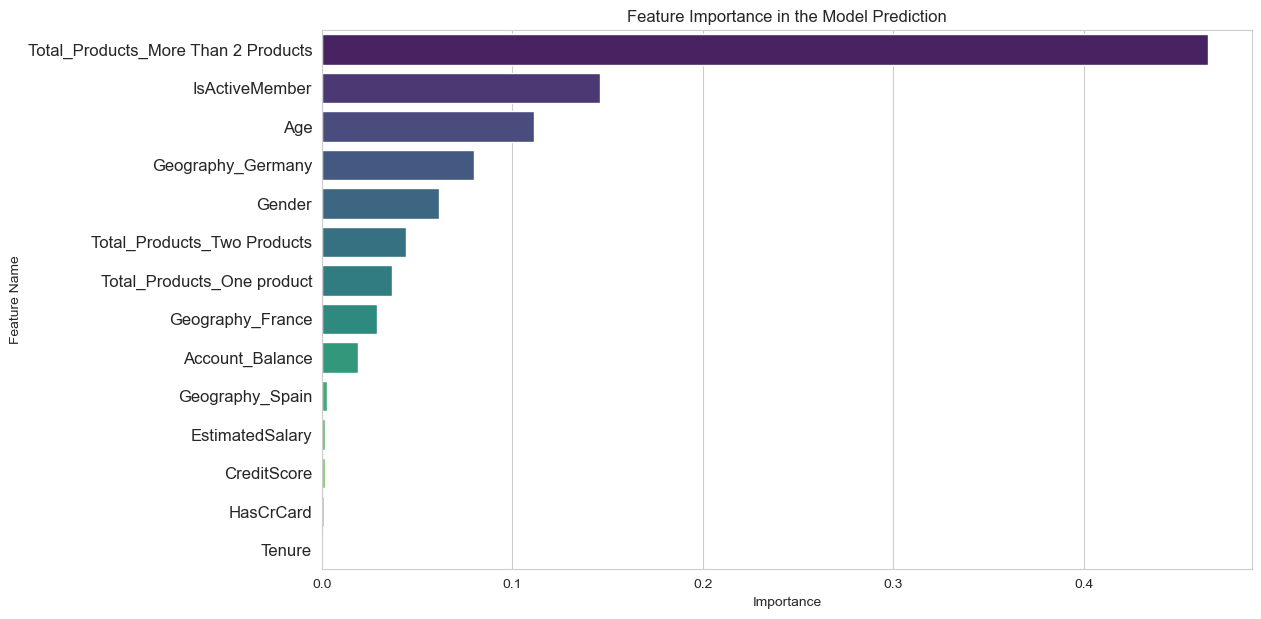

In [60]:
imp_features = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":dtree.feature_importances_})

features = imp_features.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="viridis")
plt.title("Feature Importance in the Model Prediction")
plt.yticks(size=12)
plt.show()

#### Logistic Regression

In [61]:
# Instantiate StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(X_test)

In [62]:
LR_clf = LogisticRegression(C=1.0, solver='liblinear',random_state = 0)
LR_clf.fit(x_train_resampled,y_train_resampled)

LogisticRegression(random_state=0, solver='liblinear')

In [63]:
ytrainpred_LR = LR_clf.predict(x_train_resampled)
ytestpred_LR  = LR_clf.predict(X_test)

print("Logistic Regression Accuracy Score on Training Data is",round(accuracy_score(y_train_resampled,ytrainpred_LR)*100,2),"%")
print("Logistic Regression Accuracy Score on Testing Data  is",round(accuracy_score(y_test,ytestpred_LR)*100,2),"%")

Logistic Regression Accuracy Score on Training Data is 80.96 %
Logistic Regression Accuracy Score on Testing Data  is 75.9 %


In [64]:
# Print the classification report to evaluate the performance of LR
print(classification_report(y_test, ytestpred_LR))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1595
           1       0.44      0.67      0.53       405

    accuracy                           0.76      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.76      0.78      2000



##### LR Confusion Matrix

[[1246  349]
 [ 133  272]]


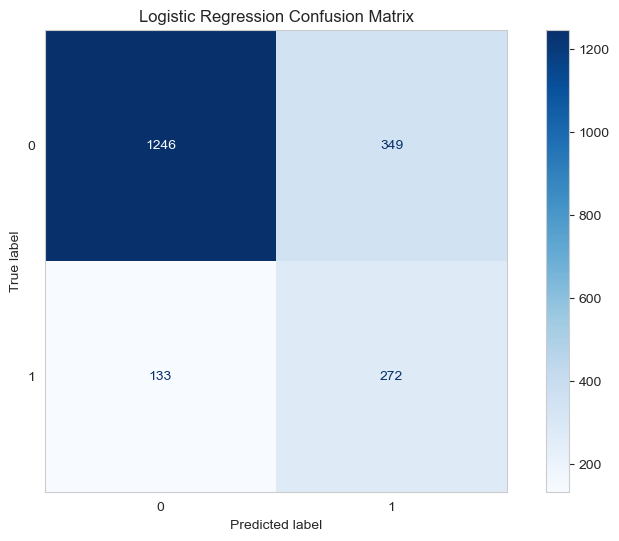

In [65]:
cnf_LR = confusion_matrix(y_test, ytestpred_LR)
print(cnf_LR)

# Plot confusion matrix without gridlines
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cnf_LR, display_labels=LR_clf.classes_)
disp_LR.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.grid(False)
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('Logistic Regression Confusion Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

The confusion matrix shows that the model correctly predicted 272 positive cases and 1246 negative cases, but it made 349 false positive errors and 133 false negative errors. Overall, while the model identifies positives well, it also makes a noticeable number of mistakes, especially in falsely predicting positives.

##### LR Evaluation;ROC Curve and Area Under the Curve (AUC)

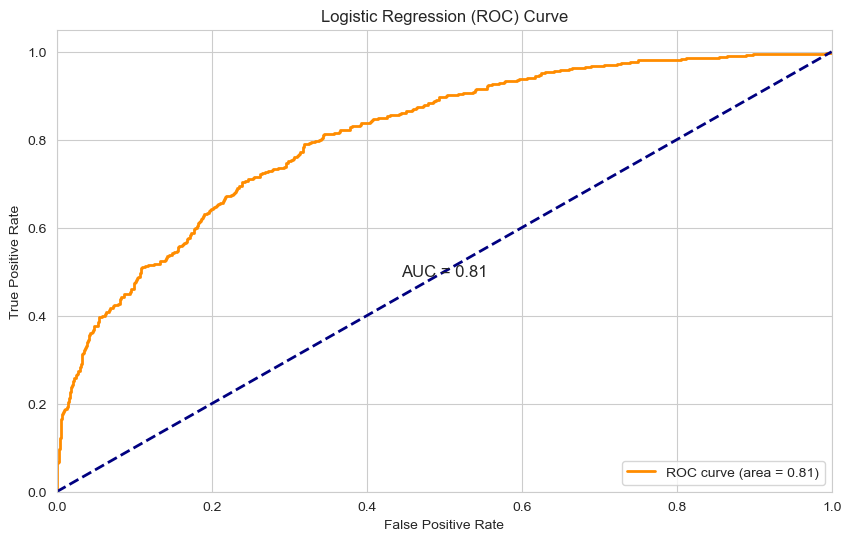

In [66]:
y_pred_proba = LR_clf.predict_proba(X_test)[:][:,1]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('LR (ROC)Curve.png')
plt.show()

An Area Under the Curve (AUC) value of 0.81 suggests that the LR model has a strong ability to distinguish between positive and negative instances, this indicates that the model performs well in differentiating between customers who churn and those who do not.It hasgood discriminative power and is effective in making accurate predictions regarding customer churn.

#### Finding Importance of Features in Logistic Regression

[-2.51627152e-03 -1.20520617e+00  1.89940064e+00 -7.31631596e-02
 -6.48753278e-01 -1.65694596e+00 -8.15702802e-07 -9.03217010e-01
 -2.54251377e+00 -1.17274865e+00  2.44955194e+00 -7.69003503e-01
  1.25063857e-02 -5.09213359e-01]


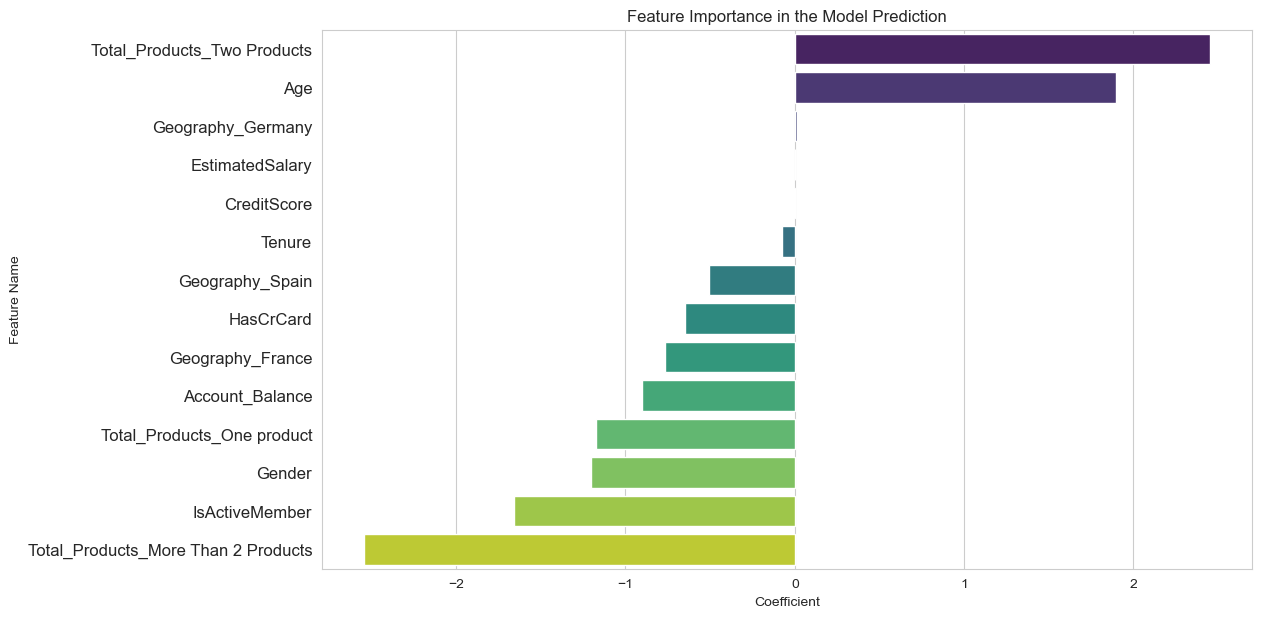

In [67]:
# Get feature coefficients from the trained logistic regression model
coefficients = LR_clf.coef_[0]
print(coefficients)

# Create a DataFrame to store feature names and their coefficients
imp_features = pd.DataFrame({"Feature Name": X_train.columns, "Coefficient": coefficients})

# Sort the features based on their coefficients
features = imp_features.sort_values(by="Coefficient", ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 7))
sns.barplot(x="Coefficient", y="Feature Name", data=features, palette="viridis")
plt.title("Feature Importance in the Model Prediction")
plt.yticks(size=12)
plt.show()

The logistic regression model's coefficients reveal insights into customer churn behavior within the banking sector. Features such as "Total_products_TwoProducts" and "Age" display positive coefficients, indicating that an increase in these factors is associated with a higher likelihood of churn. Conversely, features like tenure, credit score, and estimated salary exhibit negative coefficients, suggesting a lower propensity for churn as these factors increase. These findings imply that strategies aimed at retaining younger customers with fewer products may be crucial in reducing churn, while also emphasizing the importance of factors like tenure and financial stability in fostering customer loyalty and mitigating churn risks. By leveraging these insights, banking institutions can tailor retention strategies effectively to address the specific needs and behaviors driving customer churn.

                 Model  Score
1              XGBoost 84.250
0        Random Forest 84.150
2        Decision Tree 84.150
3  Logistic Regression 75.900


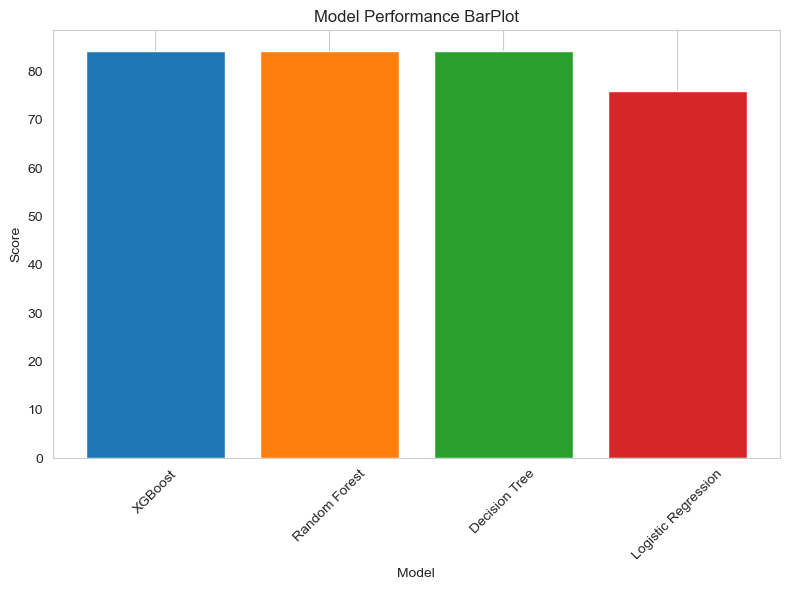

In [68]:
# Creating a DataFrame to compare the performance of different models
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree', 'Logistic Regression'],
    'Score': [round(accuracy_score(y_test,ytestpred_rfc)*100,2),
          round(accuracy_score(y_test_encoded, y_test_pred_xgb)*100,2),
          round(accuracy_score(y_test,ytestpred_dtree)*100,2),
          round(accuracy_score(y_test,ytestpred_LR)*100,2)]
})
# Sorting the DataFrame by the 'Score' column in descending order
models_sorted = models.sort_values(by='Score', ascending=False)
print(models_sorted)

# Plotting the performance of different models
plt.figure(figsize=(8, 6))
plt.bar(models_sorted['Model'], models_sorted['Score'], color=plt.cm.tab10(range(len(models_sorted))))
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance BarPlot')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('model_performance_barplot.png', bbox_inches='tight', pad_inches=0.1)
plt.show()